In [1]:
#import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
data_main = pd.read_csv('dataset/Weather_AUS.csv')
data_main

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomarrow
0,1/1/2009,16.4,38.7,0.0,12.2,9.3,54.0,15.0,28.0,27.0,11.0,1005.5,1003.3,6.0,8.0,28.9,37.4,No
1,1/2/2009,22.3,30.3,0.0,11.2,3.0,30.0,19.0,15.0,68.0,40.0,1009.5,1009.0,6.0,7.0,25.2,29.4,No
2,1/3/2009,21.2,33.3,0.0,6.2,11.7,46.0,22.0,22.0,57.0,31.0,1014.9,1012.2,6.0,5.0,24.5,32.7,No
3,1/4/2009,16.4,33.5,0.0,11.2,13.3,39.0,20.0,20.0,51.0,28.0,1016.9,1012.2,1.0,3.0,22.9,31.9,No
4,1/5/2009,19.2,34.5,0.0,12.6,13.4,35.0,19.0,11.0,44.0,22.0,1015.1,1010.6,1.0,6.0,24.2,32.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,6/21/2017,4.6,20.4,0.0,NaN,NaN,28.0,11.0,11.0,73.0,40.0,1025.7,1022.8,NaN,NaN,11.9,20.1,No
3005,6/22/2017,6.5,21.5,0.0,NaN,NaN,31.0,15.0,9.0,65.0,37.0,1027.6,1023.8,NaN,NaN,12.8,21.2,No
3006,6/23/2017,6.2,22.5,0.0,NaN,NaN,31.0,15.0,15.0,71.0,30.0,1023.6,1018.7,NaN,NaN,13.4,21.9,No
3007,6/24/2017,4.8,21.3,0.0,NaN,NaN,28.0,9.0,15.0,72.0,30.0,1020.1,1017.5,NaN,3.0,11.3,21.0,No


In [3]:
data_main.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3007.000000,3009.000000,2854.000000,2292.000000,2055.000000,2932.000000,2968.000000,2968.000000,3005.000000,3004.000000,3009.000000,3008.000000,2471.000000,2605.000000,3009.000000,3009.000000
mean,12.905853,26.950548,1.630203,7.624956,8.898589,39.890177,18.129043,16.847372,61.376705,35.808589,1018.312429,1014.928624,3.365844,3.981958,18.867132,25.651113
std,6.811774,6.902001,6.560710,6.558448,3.645674,11.349728,7.860933,7.872378,16.224022,18.380220,5.952638,5.788946,2.930869,2.592242,5.825416,6.642448
min,-3.300000,9.600000,0.000000,0.200000,0.000000,15.000000,0.000000,0.000000,10.000000,3.000000,999.000000,995.900000,0.000000,0.000000,3.800000,9.100000
25%,7.200000,21.300000,0.000000,3.600000,7.300000,31.000000,13.000000,11.000000,51.000000,24.000000,1014.000000,1010.900000,1.000000,1.000000,14.200000,20.200000
50%,13.500000,27.200000,0.000000,6.400000,10.100000,37.000000,17.000000,17.000000,60.000000,32.000000,1018.300000,1014.900000,2.000000,4.000000,19.700000,26.000000
75%,18.700000,32.500000,0.000000,9.800000,11.300000,46.000000,24.000000,22.000000,72.000000,43.000000,1022.400000,1018.900000,7.000000,6.000000,23.500000,31.000000
max,29.000000,47.300000,113.000000,65.400000,14.000000,117.000000,44.000000,54.000000,100.000000,99.000000,1035.900000,1032.300000,8.000000,8.000000,34.100000,46.700000


In [4]:
#create copy from data
data = data_main

#We should replace true and false with 1 and 0 in our target feature
data['RainTomarrow'].replace(['Yes', 'No'], [1, 0] , inplace=True)

<AxesSubplot:>

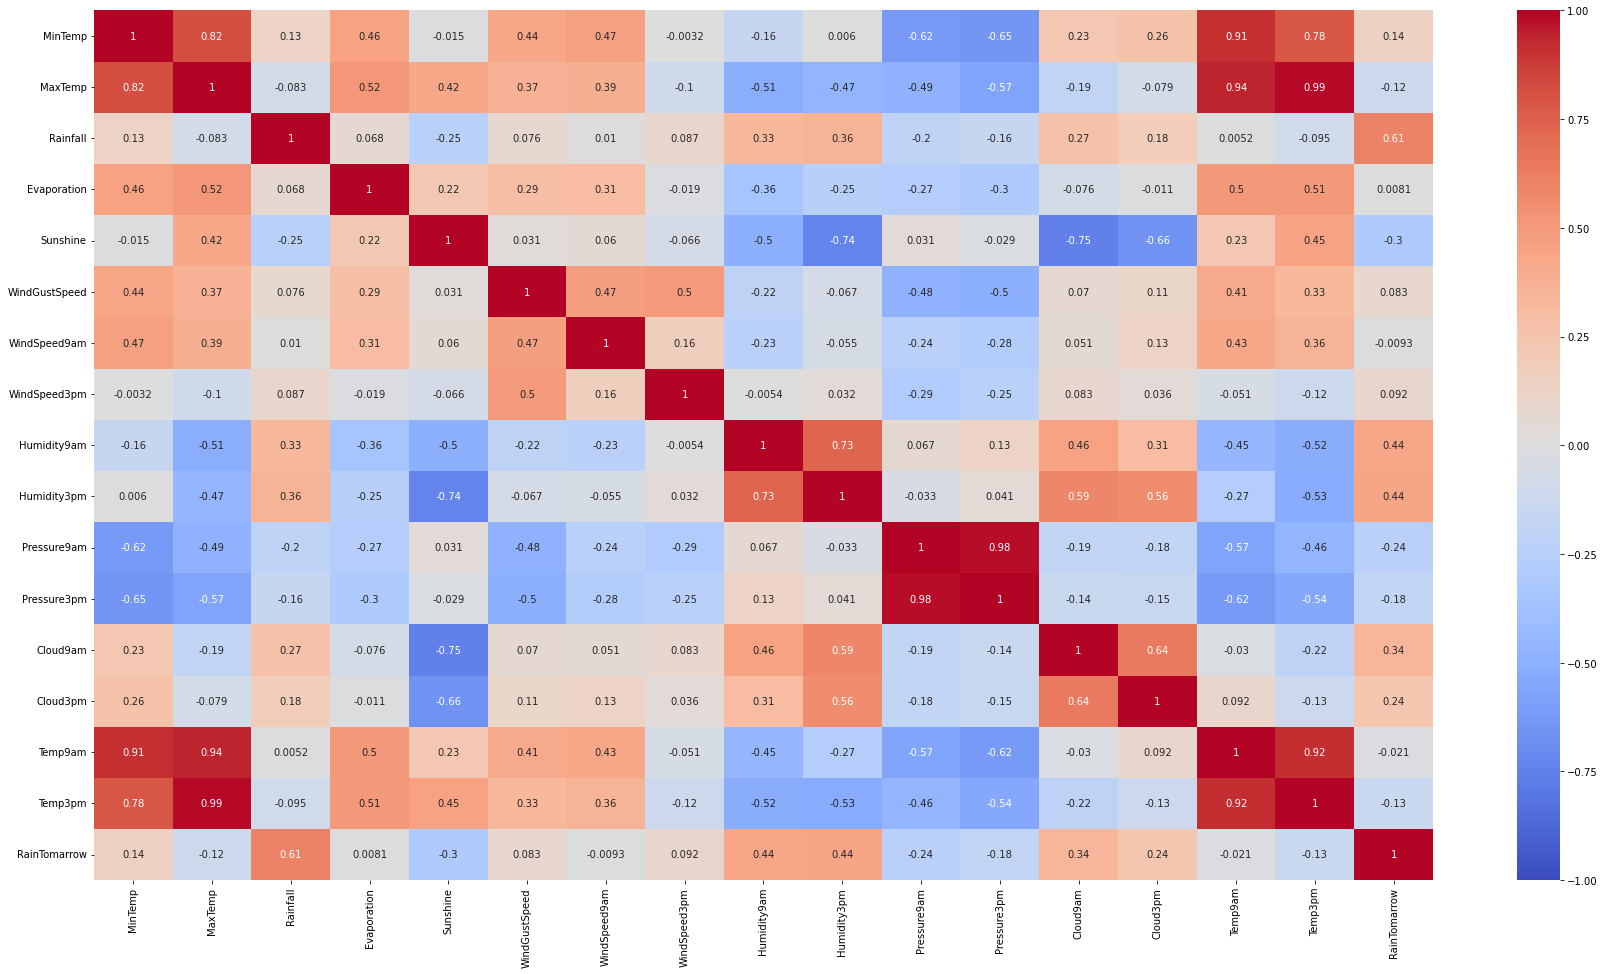

In [5]:
# بررسی ارتباط فیچرها
fig = plt.figure(figsize = (30,16))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm")

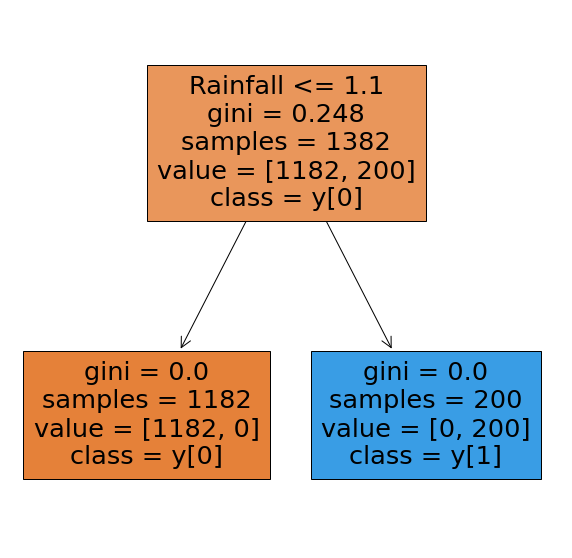

In [6]:
# بدون هیچ دستکاری ای در دیتا بررسی کنیم درخت تصمیم این داده ها رو

# یک کپی از داده ها ایجاد میکنیم صرفا جهت نمایش درخت تصمیم و داده های از دست رفته رو از داخلش حذف میکنیم

removed_missing_values = data.dropna()

X = removed_missing_values.iloc[:,1:-1]
Y = removed_missing_values.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.7)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

## درخت رو نمایش میدیم
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True,feature_names=x_train.columns,class_names=True)
plt.show()

In [7]:
clf_pred=clf.predict(x_test)
metrics.accuracy_score(y_test,clf_pred)

1.0

In [8]:
# با توجه به بررسی های انجام شده ، صحبت های دوستان و خروجی درخت تصمیم به این نتیجه رسیدیم که این فیچر دارای نشتی بوده و باید از مجموعه فیچر ها حذف شود